In [9]:
R.version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.1                         
year           2023                        
month          06                          
day            16                          
svn rev        84548                       
language       R                           
version.string R version 4.3.1 (2023-06-16)
nickname       Beagle Scouts               

# How to use R on Colab

Runtime / change runtime type / R
enjoy it!

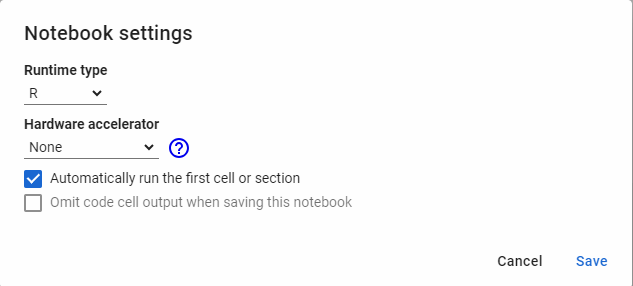

# 0.&nbsp;Liberaries

In [10]:
# Liberaries

if (!require("dplyr")) {
  install.packages("dplyr")
  library("dplyr")
} else {
  library("dplyr")
}

if (!require("TSA")) {
  install.packages("TSA")
  library("TSA")
} else {
  library("TSA")
}

# 1. Homeworks

## 1.1. Homework 1

1. Two factors determine the brightness of a star: its luminosity (how much energy it puts out in a given time) and its distance from the Earth. The data in are nightly brightness measurements (in magnitude)
of a single star over a period of 600 nights.     
Data file: star (TSA). There are n = 600 observations. Measurements are taken each night.      

- (a) Construct a time series plot for the star data.  

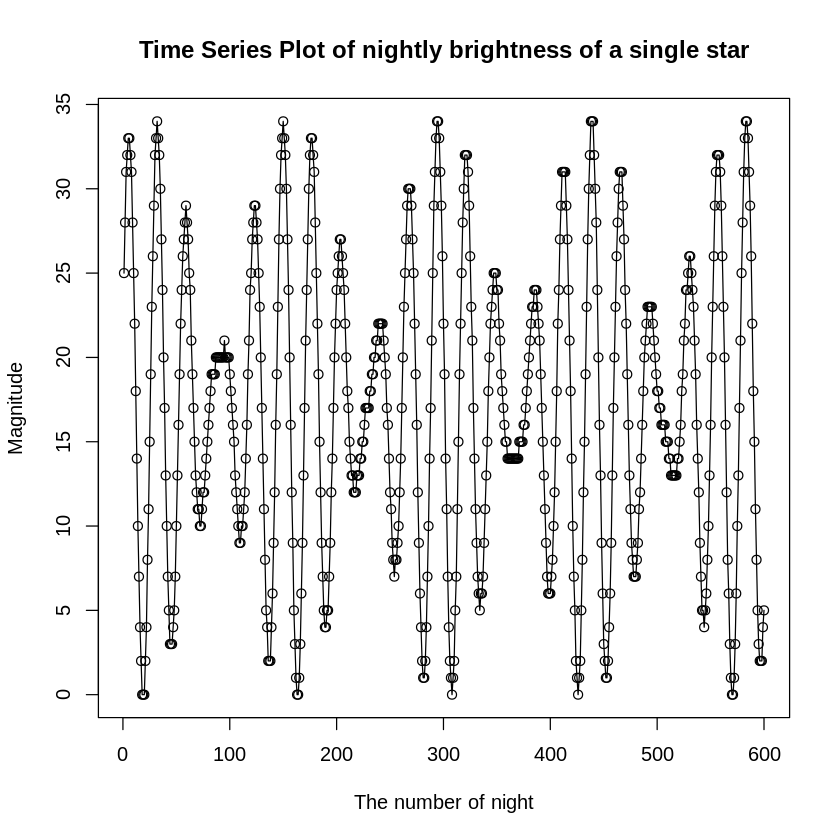

In [11]:
library(TSA)
data(star)
df = star

# Time Series Plot
plot(df, ylab="Magnitude",
         xlab="The number of night",
         type="o",
         main="Time Series Plot of nightly brightness of a single star")


- (b) Construct a lag-1 scatter plot,     

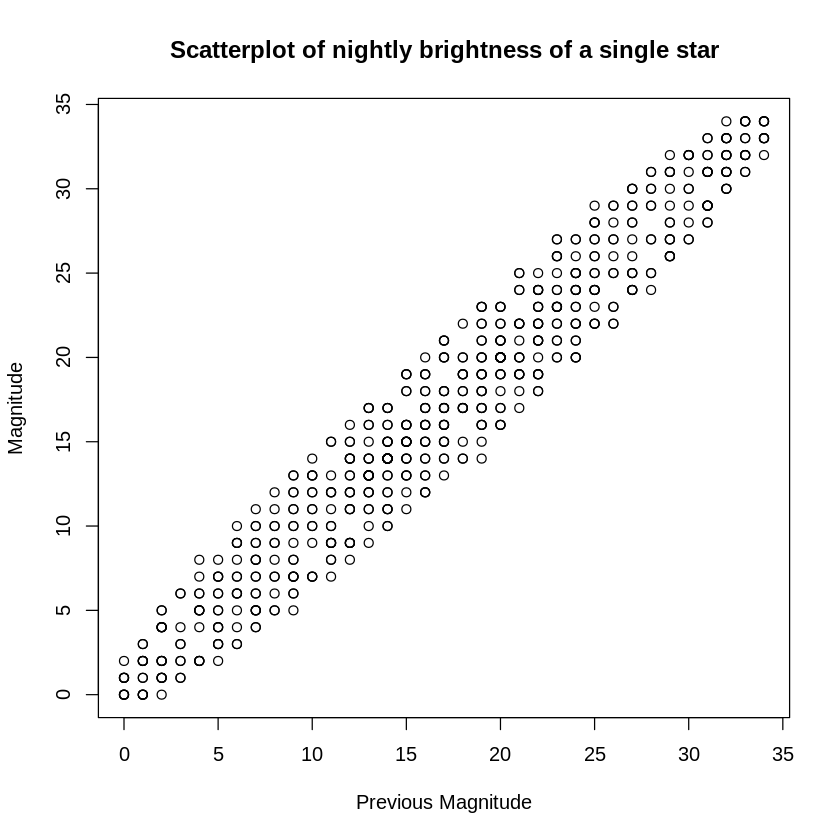

In [12]:
require(TSA)
data(star)

#Lag-1 scatterplot
plot(y = star,
     x = zlag(star,1),
     ylab = "Magnitude",
     xlab = "Previous Magnitude",
     #type = "o",
     main = "Scatterplot of nightly brightness of a single star" )

- and calculate lag-1 correlation.

In [13]:
# Lag-12 correlation
cor(star, zlag(star,1), use="complete.obs")


Star,0.9724252


- (c) What noticeable patterns you observed?     

    - **Answer**: There is a high correlation between two consecutive values. A clear trend is seen in the plot of "star" dataset.      

- (d) Can you predict the brightness of stars next night based on the brightness of stars in the previous night.     
    - **Answer**: I think so. Because there is a clear pattern in the data. Also, based on physics perspective, brightness of the stars has an accurate behaviour.
---    

2. The Bureau of Transportation Statistics publishes monthly passenger traffic data reflecting 100 percent of scheduled operations for airlines in the United States. The data are monthly U.S. airline passenger miles traveled from 1/1996 to 5/2005.        
Data file: airmiles(TSA). There are n = 113 observations. Measurements are taken each month.      

- (a) Construct a time series plot with monthly plotting symbols for the airmiles data.  

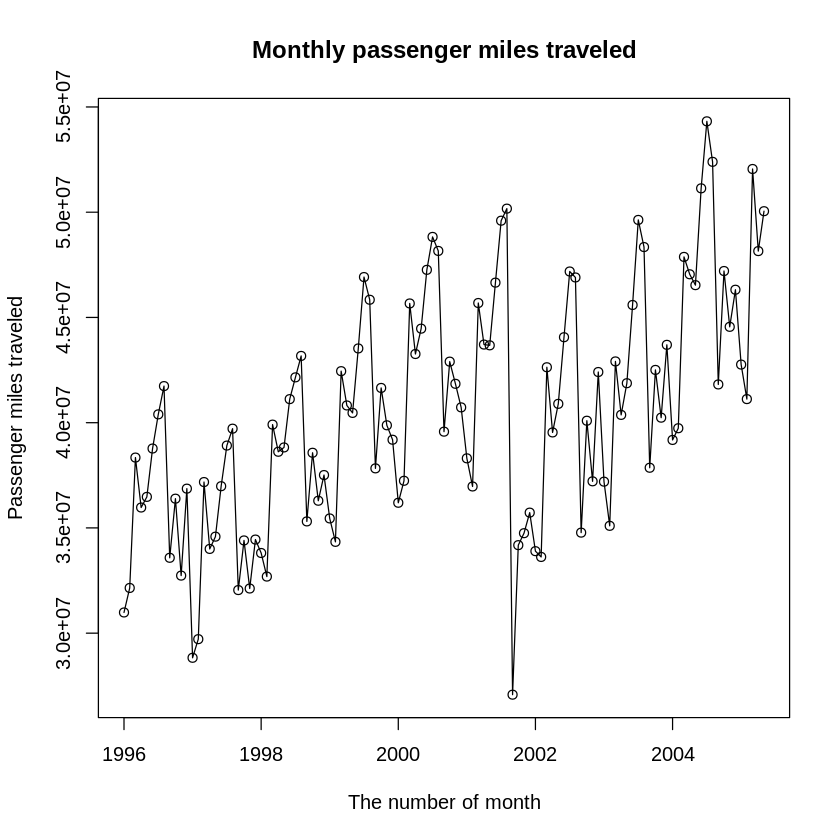

In [14]:
require(TSA)
data("airmiles")
df = airmiles

#Time Series Plot
plot(df,
     ylab = "Passenger miles traveled",
     xlab = "The number of month",
     type = "o",
     # Note 1: To add the initials of the months, it would be better to use  type = "l"
     main = "Monthly passenger miles traveled" )
#points(y=df,x=time(df),pch=as.vector(season(df)))
# Note 2: The above line adds the initials of the months on the points.

- (b) Construct a lag-12 scatter plot and calculate lag-12 correlation.        


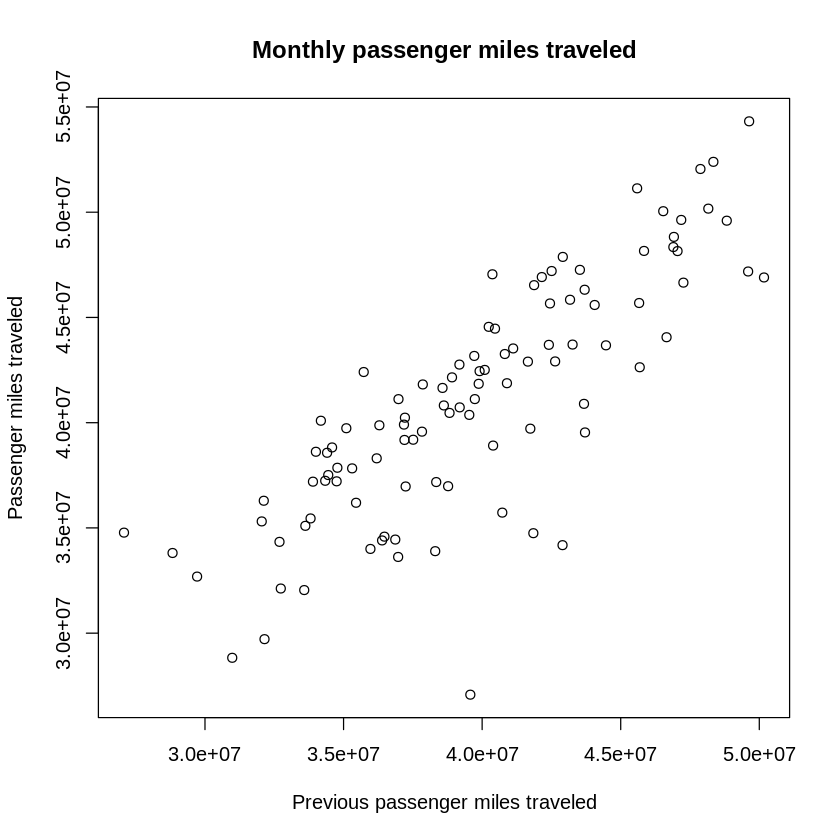

In [15]:
require(TSA)
data("airmiles")
df = airmiles

# Lag-12 scatterplot
plot(y = df,
     x = zlag(df,12),
     ylab = "Passenger miles traveled",
     xlab = "Previous passenger miles traveled",
     #type = "o",
     main = "Monthly passenger miles traveled" )


In [16]:
# Lag-12 correlation
cor(airmiles, zlag(airmiles,12), use="complete.obs")


airmiles,0.8147223


- (c) What noticeable patterns you observed?    
    - **Answer**: The only pattern I can see in about an increasing general trend.     


- (d) Can you predict the air miles in December 2004 based on the air miles in December 2003? Why or why not?     
    - **Answer**: No. Because again, I would say, the only pattern I can see in about an increasing general trend.

## 1.2. Homework 2

1. Answer the following questions using simulated date. Please make sure you set the seed of R’s random number generator, which makes your simulations reproducible.  

(a) Simulate and plot a white noise process $e_{t}\sim \ iid \ \ \chi^2(1)$ of length $n = 150$.

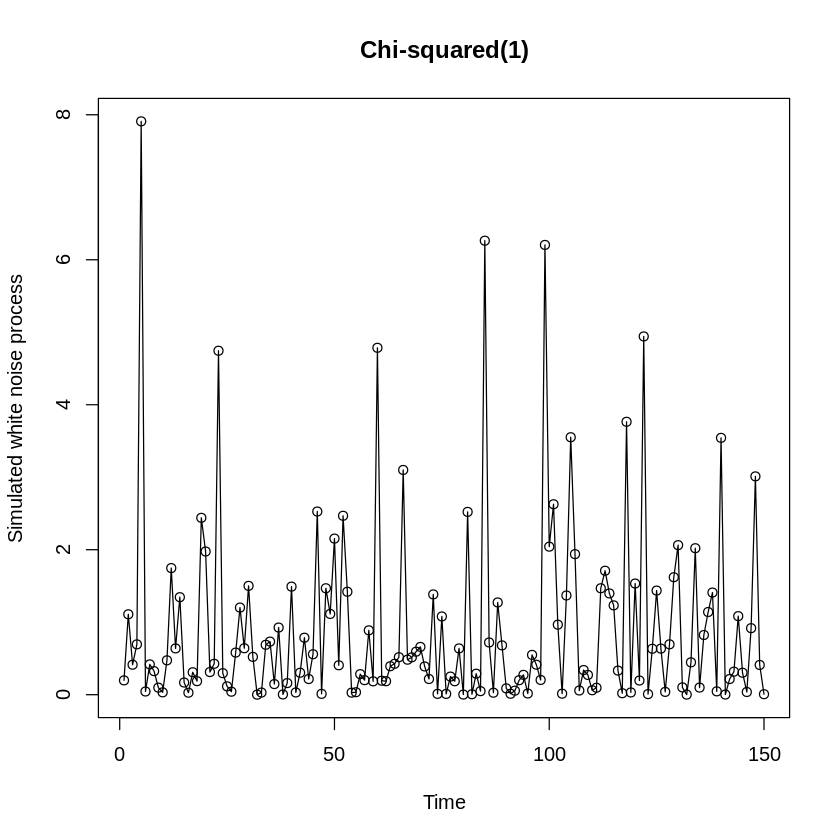

In [17]:
library (TSA) # Load the TSA package

# Example 1: white noise
# noises are Chi-squared(1) distributed
set.seed(1)
wn.chisq1 = rchisq(150,1)

plot(wn.chisq1,
     ylab="Simulated white noise process",
     xlab="Time",
     main="Chi-squared(1)",
     type="o")

(b) For your simulated series, create and plot the corresponding random walk process $Y_{t} = Y_{t-1} + e_{t}$.
Please note that the mean of this random walk process is not zero.

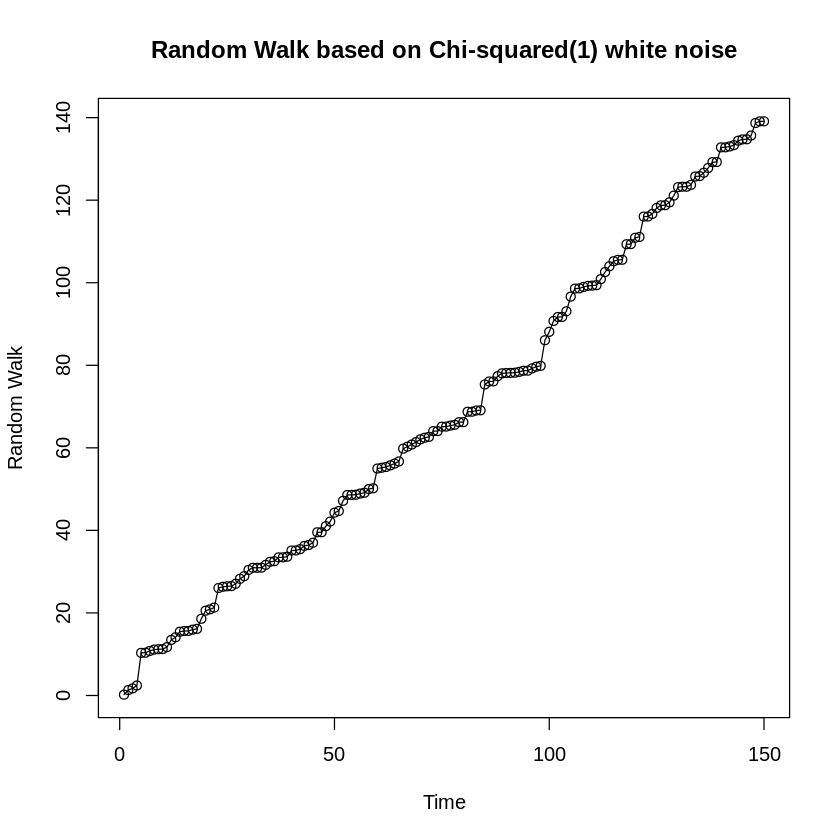

In [18]:
# Example 2: random walk
# Part 1: random walk based on Chi-squared(1) distribution
# Time Series Plot

set.seed(1)
wn.chisq1 = rchisq(150,1)

random.walk.chisq1 = c() #wn.chisq1*0 #To make a zero vector with the length of wn.chisq1
for(i in 1:length(wn.chisq1))
   {random.walk.chisq1[i] = sum(wn.chisq1[1:i]) }

plot(random.walk.chisq1,
     ylab="Random Walk",
     xlab="Time",
     main="Random Walk based on Chi-squared(1) white noise",
     type="o")

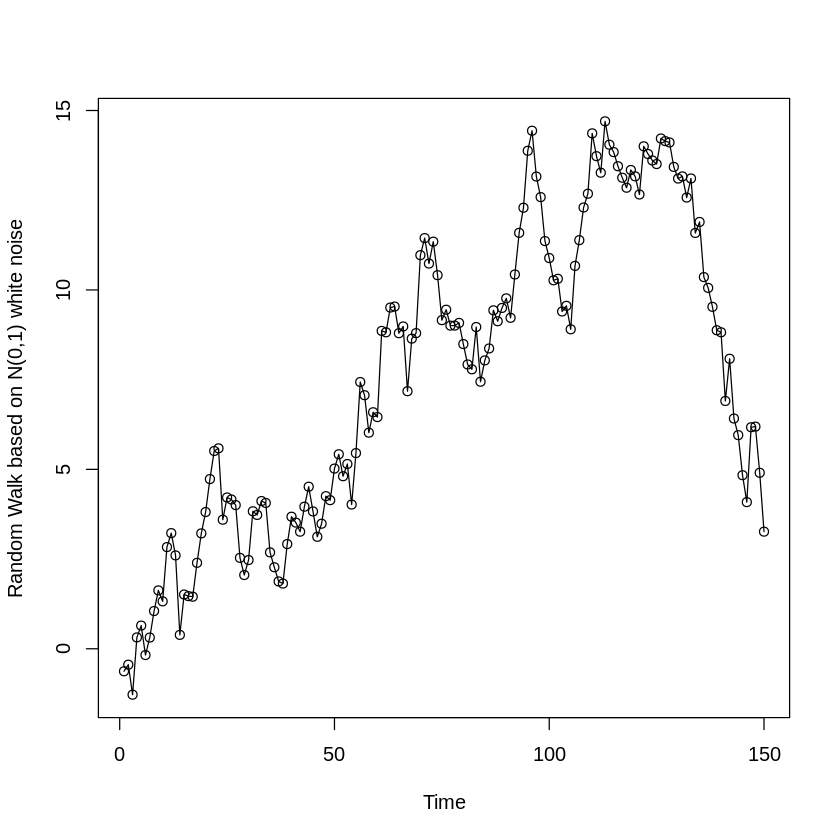

In [19]:
set.seed(1)
wn.n01<-rnorm(150,0,1)
random.walk.n01<-wn.n01*0
for(i in 1:length(wn.n01))
{random.walk.n01[i]<-sum(wn.n01[1:i])
}
plot(random.walk.n01,ylab="Random Walk based on N(0,1) white noise",xlab="Time",type="o")

(c) Comment on the differences between this simulated random walk processes and the simulated random walk based on standard normal distribution.    
**Answer**: I think the main deference of these two is about that the mean of the Chi-squared(1) random walk process is not zero. This makes it cumulative. of course, it has fluctuations too but this size of ups and does are negligible in comparison with the whole scenario.   
Also the Chi-squared(1) oscillates in a wider range.

## 1.3. Homework 3